# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display formatting
pd.set_option("display.float_format", lambda x: f"{x:.3f}")
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12, 8)

# Read dataset
cars = pd.read_csv("https://jdgrossman.com/assets/used-cars.tsv", sep="\t")

# Peek 10 random rows
cars.sample(10)


,type,year,make,model,trim,mileage,price
979,USED,2011,Infiniti,G Sedan,G37 Journey,38783,22998
189,USED,2008,Acura,MDX,Base,113398,19999
518,USED,2011,BMW,3 Series,328i xDrive,29927,25500
546,USED,2011,BMW,3 Series,335i,25085,35000
359,USED,2011,BMW,3 Series,328i xDrive,25468,22500
1281,USED,2013,Volkswagen,Jetta,SE PZEV,39233,14599
477,USED,2011,BMW,3 Series,328i xDrive,31772,27000
478,USED,2011,BMW,3 Series,335i,52516,29000
930,USED,2011,Infiniti,G Sedan,G37 Journey,34526,22987
302,USED,2006,Audi,A4,2.0T,83567,10900


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

**1.1 Create Dataset**

In [2]:

# Create dataset of USED Honda Accords
accords = cars[(cars["type"]=="USED") &
               (cars["make"]=="Honda") &
               (cars["model"]=="Accord")]

print("Number of Accord rows:", len(accords))
accords.sample(5)

Number of Accord rows: 122


,type,year,make,model,trim,mileage,price
687,USED,2013,Honda,Accord,LX,46805,16974
882,USED,2006,Honda,Accord,LX,142387,8991
716,USED,2004,Honda,Accord,EX V-6,109727,10988
759,USED,2005,Honda,Accord,LX Special Edition,135399,7882
840,USED,2000,Honda,Accord,EX V6,98588,4491


**1.2 Fit Regression**

In [6]:
import statsmodels.api as sm

# Define X and y
X = sm.add_constant(accords["mileage"])  # adds intercept
y = accords["price"]

# Fit regression model
model = sm.OLS(y, X).fit()

# Regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        04:22:24   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+04    399.474     51.757      0.0

**1.3 Extract Results**

In [7]:
# Extract results
beta0 = model.params["const"]
beta1 = model.params["mileage"]
se_beta0 = model.bse["const"]
se_beta1 = model.bse["mileage"]
resid_se = (model.mse_resid)**0.5
r2 = model.rsquared

**1.4 Print Results**

In [8]:
# Print results
print(f"Intercept (beta0): {beta0:.2f}")
print(f"Slope (beta1): {beta1:.4f}")
print(f"se(beta0): {se_beta0:.2f}")
print(f"se(beta1): {se_beta1:.6f}")
print(f"Residual SD (sigma_hat): {resid_se:.2f}")
print(f"R-squared: {r2:.3f}")

Intercept (beta0): 20675.67
Slope (beta1): -0.0878
se(beta0): 399.47
se(beta1): 0.004701
Residual SD (sigma_hat): 2420.41
R-squared: 0.744



---

The value of $\hat{\beta}_0$ with units:

Interpretation:
$20675.67
---

The value of $\hat{\beta}_1$ with units:

Interpretation:$-0.0878

---

The value of $\text{se}({\hat{\beta}_0})$ with units:

Interpretation:$399.47

---

The value of $\text{se}({\hat{\beta}_1})$ with units:

Interpretation:$0.004701

---

The value of $\hat{\sigma}$ with units:

Interpretation:$2420.41

---

The value of $\text{R}^2$ with units:

Interpretation:$0.744

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

**2.1 Mileage 50000 -> mean, normal interval**

In [9]:

mileage_new = 50000

# dataframe
X_new = pd.DataFrame({"const": [1], "mileage": [mileage_new]})

# prediction with confidence interval 0.05
pred = model.get_prediction(X_new).summary_frame(alpha=0.05)

print(pred)



       mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0 16285.195  240.437      15809.147      16761.244     11469.368     21101.023


**2.2 Printing results**

In [19]:
mean_pred = pred["mean"].iloc[0]
ci_low = pred["mean_ci_lower"].iloc[0]
ci_high = pred["mean_ci_upper"].iloc[0]

print(f"Predicted mean price at 50,000 miles: ${mean_pred:,.2f}")
print(f"95% CI for the mean: (${ci_low:,.2f}, ${ci_high:,.2f})")


Predicted mean price at 50,000 miles: $16,285.20
95% CI for the mean: ($15,809.15, $16,761.24)


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

**3.1 Mean & Interval for mileage 300000**

In [11]:
mileage_new = 300000

# dataframe
X_new = pd.DataFrame({"const": [1], "mileage": [mileage_new]})

# prediction with confidence interval 0.05
pred_300k = model.get_prediction(X_new).summary_frame(alpha=0.05)

print(pred_300k)



       mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0 -5667.200 1098.431      -7842.017      -3492.383    -10929.842      -404.558


**3.2 Printing Reults**

In [16]:
mean_pred_300k = pred_300k["mean"].iloc[0]
ci_low_300k = pred_300k["mean_ci_lower"].iloc[0]
ci_high_300k = pred_300k["mean_ci_upper"].iloc[0]

print(f"Predicted mean price at 300,000 miles: ${mean_pred_300k:,.2f}")
print(f"95% CI for the mean: (${ci_low_300k:,.2f}, ${ci_high_300k:,.2f})")


Predicted mean price at 300,000 miles: $-5,667.20
95% CI for the mean: ($-7,842.02, $-3,492.38)


---

Write your answer to Exercise 3 here.


---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

**4.1 Scatter Plot**

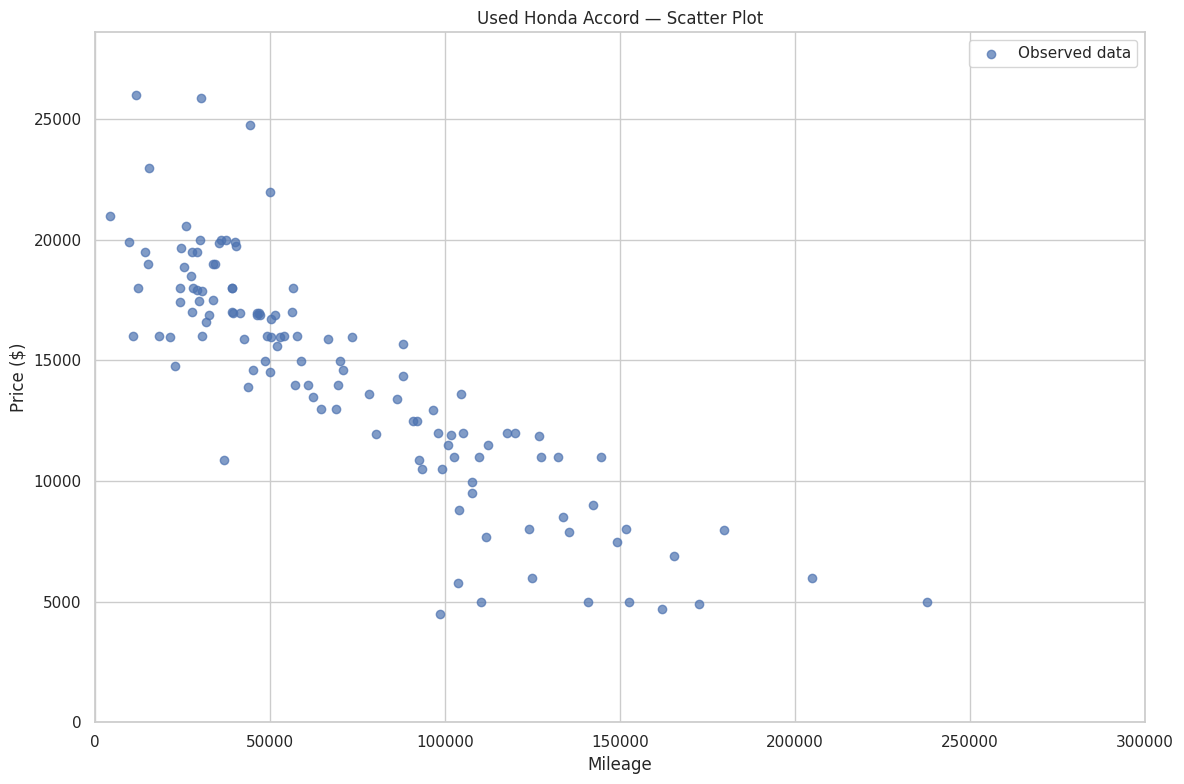

In [45]:
# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(accords["mileage"], accords["price"], alpha=0.7, label="Observed data")
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.title("Used Honda Accord — Scatter Plot")
plt.xlim(0, 300000)
plt.ylim(0, accords["price"].max() * 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**4.2 Regression line only**

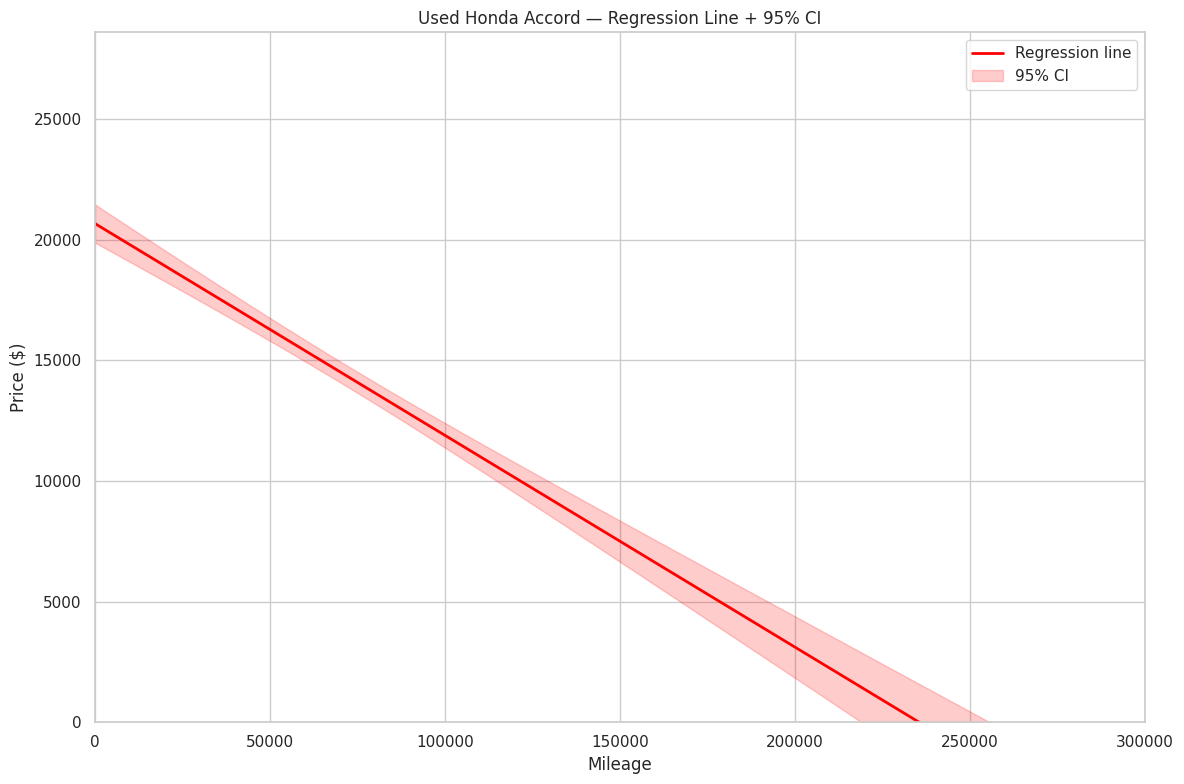

In [46]:
mileage_grid = np.linspace(0, 300000, 300)
X_grid = pd.DataFrame({"const": 1, "mileage": mileage_grid})
pred_grid = model.get_prediction(X_grid).summary_frame(alpha=0.05)

# Regression line + 95% CI
plt.figure(figsize=(12, 8))
plt.plot(mileage_grid, pred_grid["mean"], color="red", linewidth=2, label="Regression line")
plt.fill_between(mileage_grid,
                 pred_grid["mean_ci_lower"],
                 pred_grid["mean_ci_upper"],
                 color="red", alpha=0.2, label="95% CI")
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.title("Used Honda Accord — Regression Line + 95% CI")
plt.xlim(0, 300000)
plt.ylim(0, accords["price"].max() * 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**4.3 Regression line + scatter plot**

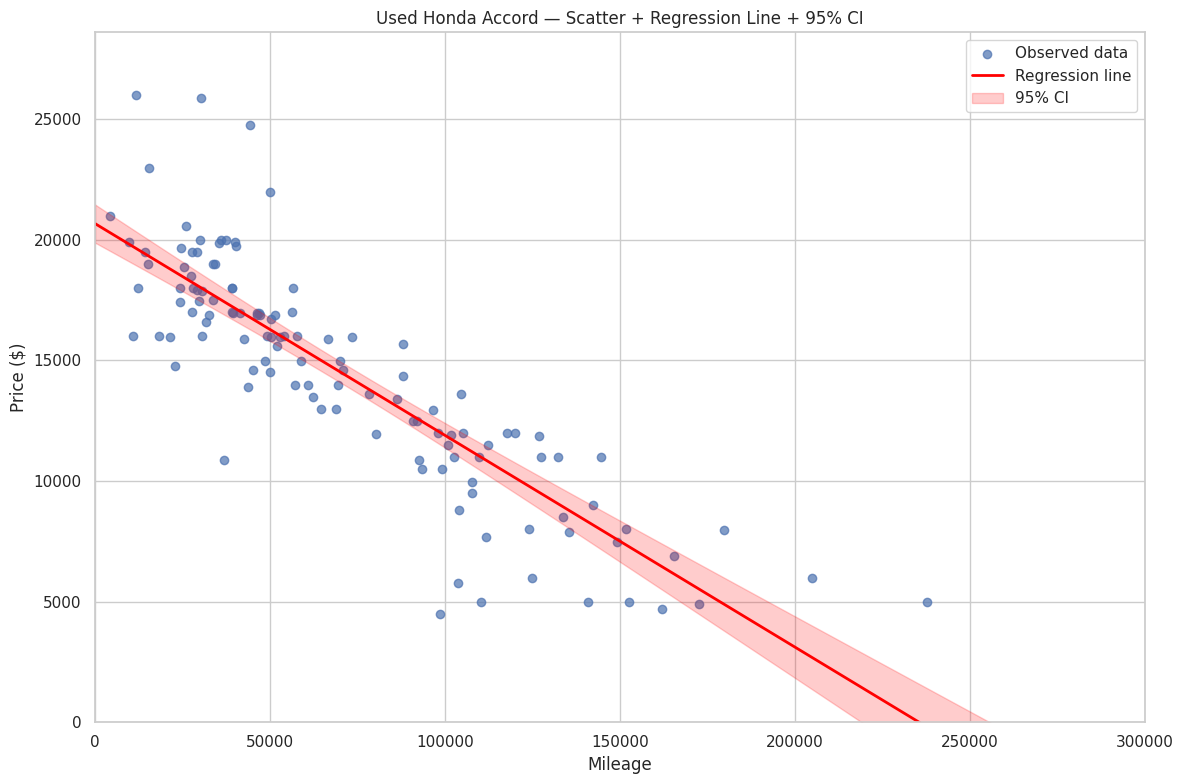

In [47]:
# Scatter + Regression line + 95% CI
plt.figure(figsize=(12, 8))
plt.scatter(accords["mileage"], accords["price"], alpha=0.7, label="Observed data")
plt.plot(mileage_grid, pred_grid["mean"], color="red", linewidth=2, label="Regression line")
plt.fill_between(mileage_grid,
                 pred_grid["mean_ci_lower"],
                 pred_grid["mean_ci_upper"],
                 color="red", alpha=0.2, label="95% CI")
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.title("Used Honda Accord — Scatter + Regression Line + 95% CI")
plt.xlim(0, 300000)
plt.ylim(0, accords["price"].max() * 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [49]:

mileages_new = [50000, 300000]
X_new = sm.add_constant(pd.DataFrame({"mileage": mileages_new}))
log_pred = log_model.get_prediction(X_new).summary_frame(alpha=0.05)

pred_price = np.exp(log_pred["mean"])
ci_lower = np.exp(log_pred["mean_ci_lower"])
ci_upper = np.exp(log_pred["mean_ci_upper"])

for i, mileage in enumerate(mileages_new):
    print(f"\nPredicted price for mileage {mileage:,}: ${pred_price[i]:,.2f}")
    print(f"95% CI for mean price: (${ci_lower[i]:,.2f}, ${ci_upper[i]:,.2f})")



Predicted price for mileage 50,000: $15,745.93
95% CI for mean price: ($15,136.01, $16,380.43)

Predicted price for mileage 300,000: $2,498.62
95% CI for mean price: ($2,086.02, $2,992.83)


## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

**6.1 Scatter Plot**

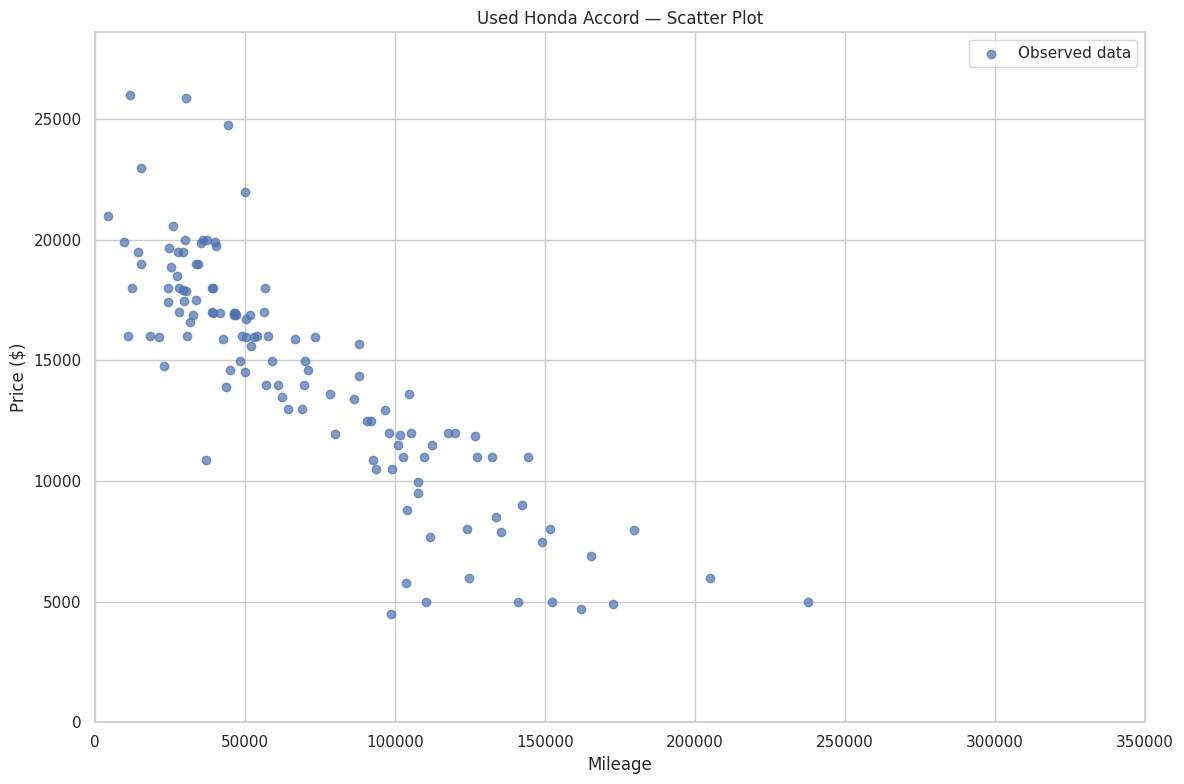

In [50]:
# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(accords["mileage"], accords["price"], alpha=0.7, label="Observed data")
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.title("Used Honda Accord — Scatter Plot")
plt.xlim(0, 350000)
plt.ylim(0, accords["price"].max() * 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**6.2 Grid & predictions**

In [51]:
# grid for regression
mileage_grid = np.linspace(0, 350000, 350)
X_grid = sm.add_constant(mileage_grid)
pred_grid = log_model.get_prediction(X_grid).summary_frame(alpha=0.05)

# predictions
pred_mean = np.exp(pred_grid["mean"])
pred_lower = np.exp(pred_grid["mean_ci_lower"])
pred_upper = np.exp(pred_grid["mean_ci_upper"])

**6.3  Regression Line**

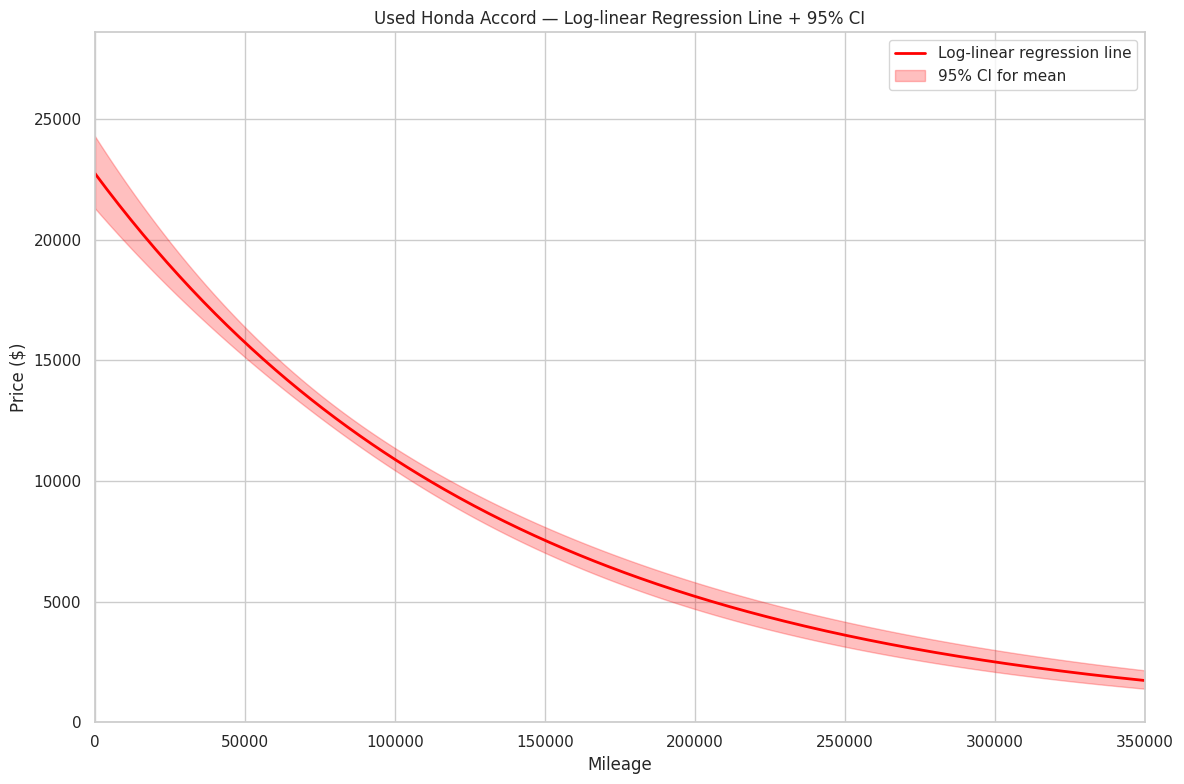

In [52]:
# Plot regression line + 95% CI
plt.figure(figsize=(12, 8))
plt.plot(mileage_grid, pred_mean, color="red", linewidth=2, label="Log-linear regression line")
plt.fill_between(mileage_grid, pred_lower, pred_upper, color="red", alpha=0.25, label="95% CI for mean")
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.title("Used Honda Accord — Log-linear Regression Line + 95% CI")
plt.xlim(0, 350000)
plt.ylim(0, accords["price"].max() * 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**6.4 Regression line on Scatter plot**

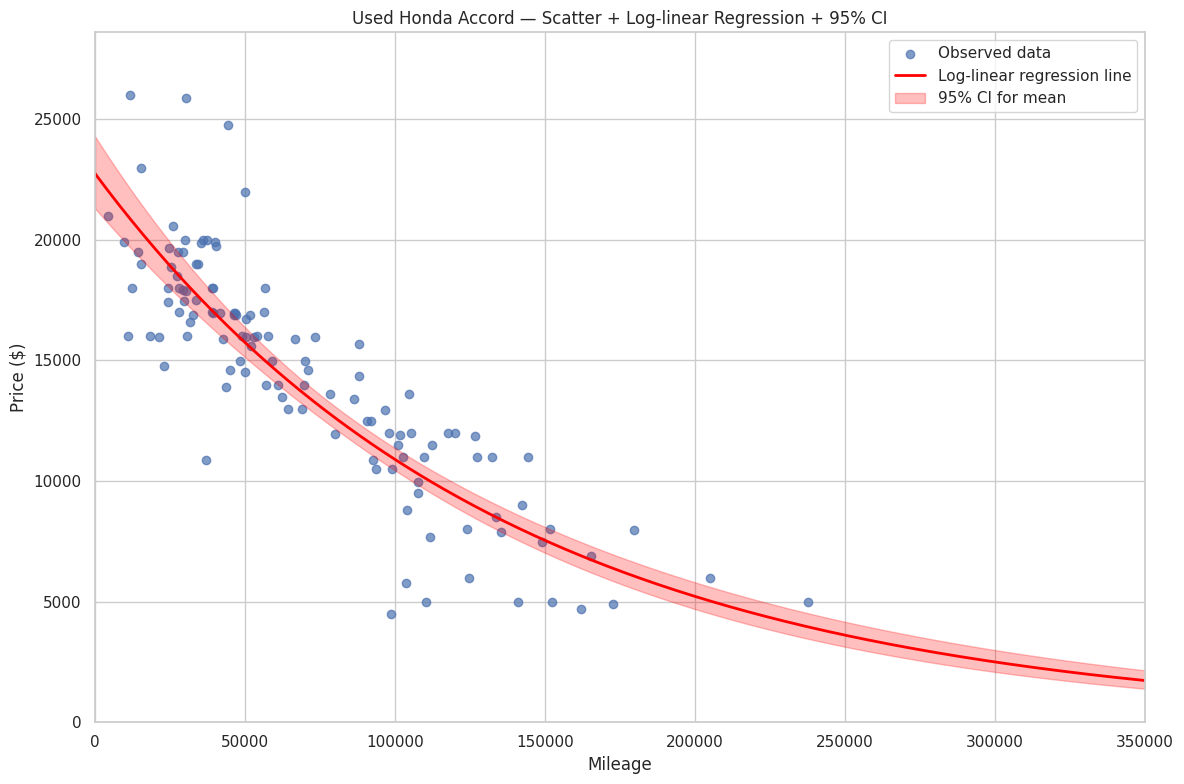

In [53]:
# Plot scatter + regression line + 95% CI
plt.figure(figsize=(12, 8))
plt.scatter(accords["mileage"], accords["price"], alpha=0.7, label="Observed data")
plt.plot(mileage_grid, pred_mean, color="red", linewidth=2, label="Log-linear regression line")
plt.fill_between(mileage_grid, pred_lower, pred_upper, color="red", alpha=0.25, label="95% CI for mean")
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.title("Used Honda Accord — Scatter + Log-linear Regression + 95% CI")
plt.xlim(0, 350000)
plt.ylim(0, accords["price"].max() * 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [55]:

# coefficient of log-linear model
beta0 = log_model.params["const"]
beta1 = log_model.params["mileage"]
r2 = log_model.rsquared

# exponent coefficients
exp_beta0 = np.exp(beta0)
exp_beta1 = np.exp(beta1)

print(f"exp(β̂0) = {exp_beta0:.2f}  → baseline price when mileage = 0 (in dollars)")
print(f"exp(β̂1) per 1 mile = {exp_beta1:.6f}  → multiplicative change per 1 mile")
print(f"R-squared = {r2:.3f}  → proportion of variance in log(price) explained by mileage")

# For 10,000-mile increase
exp_beta1_10k = np.exp(beta1 * 10000)
print(f"exp(β̂1) per 10,000 miles = {exp_beta1_10k:.3f}")
print(f"For every 10,000 additional miles, the expected price is multiplied by {exp_beta1_10k:.3f}")


exp(β̂0) = 22754.22  → baseline price when mileage = 0 (in dollars)
exp(β̂1) per 1 mile = 0.999993  → multiplicative change per 1 mile
R-squared = 0.748  → proportion of variance in log(price) explained by mileage
exp(β̂1) per 10,000 miles = 0.929
For every 10,000 additional miles, the expected price is multiplied by 0.929



---

The value of $\exp(\hat{\beta}_0)$ with units:

Interpretation: 22754.22  

---

The value of $\exp(\hat{\beta}_1)$ with units:

Interpretation: 0.999993  

---

The value of $\text{R}^2$ with units:

Interpretation: 0.748  

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

**8.1 Fitting Regression**

In [63]:
X = accords[["mileage", "year"]]
X = sm.add_constant(X)

# log-transformed price
y_log = np.log(accords["price"])

# Fit log-linear regression
log_model_year = sm.OLS(y_log, X).fit()


**8.2 Comparing R-square**

In [64]:
# Print summary
#print(log_model_year.summary())

# Compare R-squared with log_model
r2_old = log_model.rsquared
r2_new = log_model_year.rsquared
print(f"Previous R² (mileage only): {r2_old:.3f}")
print(f"New R² (mileage + year): {r2_new:.3f}")



Previous R² (mileage only): 0.748
New R² (mileage + year): 0.863


---

Write your answer to Exercise 8 here.


---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [65]:

X_all = cars[["mileage", "year"]]
X_all = sm.add_constant(X_all)

y_log_all = np.log(cars["price"])

# Fit log-linear regression on full dataset
log_model_all = sm.OLS(y_log_all, X_all).fit()

# Print R-square
print(f"R² on full dataset: {log_model_all.rsquared:.3f}")
print(f"R² from Honda Accord model: {log_model_year.rsquared:.3f}")




R² on full dataset: 0.653
R² from Honda Accord model: 0.863


---

Write your answer to Exercise 9 here.


---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [66]:
X_full = cars[["mileage", "year", "make", "model"]].copy()

X_full = X_full.dropna()
y_log_full = np.log(cars.loc[X_full.index, "price"])

# Convert categorical variables into dummy
X_full = pd.get_dummies(X_full, columns=["make", "model"], drop_first=True)
X_full = X_full.astype(float)


X_full = sm.add_constant(X_full)
log_model_full = sm.OLS(y_log_full, X_full).fit()

# Check summary
print(log_model_full.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        06:07:41   Log-Likelihood:                 691.86
No. Observations:                1286   AIC:                            -1360.
Df Residuals:                    1274   BIC:                            -1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -141.1849      3.951    -

---

1) Different makes and models have very different baseline prices, makes much smaller R²
2) Centering mileage and year would make it more interpretable

---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

**11.1 Centering mileage & year**

In [60]:
# dataset
cars_clean = cars.dropna(subset=["price", "mileage", "year", "make", "model"])

# Center mileage and year
cars_clean["mileage_c"] = cars_clean["mileage"] - cars_clean["mileage"].mean()
cars_clean["year_c"] = cars_clean["year"] - cars_clean["year"].mean()


**11.2 Convert categorical variables**

In [61]:
X_full = cars_clean[["mileage_c", "year_c", "make", "model"]]
y_log = np.log(cars_clean["price"])

# Convert categorical variables to dummies
X_full = pd.get_dummies(X_full, columns=["make", "model"], drop_first=True)
X_full = X_full.astype(float)

**11.3 Model Summary**

In [62]:
X_full = sm.add_constant(X_full)

# Fit log-linear regression
log_model_centered = sm.OLS(y_log, X_full).fit()

# model summary
print(log_model_centered.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        06:02:11   Log-Likelihood:                 691.86
No. Observations:                1286   AIC:                            -1360.
Df Residuals:                    1274   BIC:                            -1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.5083      0.004   22

---

Write your answer to Exercise 11 here.


---